# Intel MPI Benchmarks

Results of selected MPI1 tests from the [IMB benchmark suite](https://software.intel.com/content/www/us/en/develop/documentation/imb-user-guide/top.html).

Single transfer (2x processes communicate):
- pingpong

Parallel-transfer tests (more than 2 processes communicate):
- uniband: processes communicate in pairs split between 1st and 2nd half of ranks
- biband: As for uniband but communication initiated in both directions

All tests measure latency and bandwidth for a range of message sizes.


In [2]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../reframe', '..')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs message size

These plots show "raw" output from all tests involving only 2x processes, plotting bandwidth & latency (where calculated) against message size.

These results are for the most-recent run on each system/partition/environment combination.

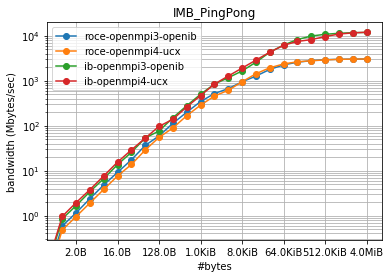

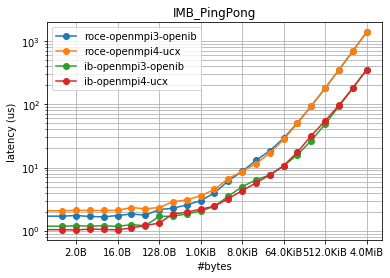

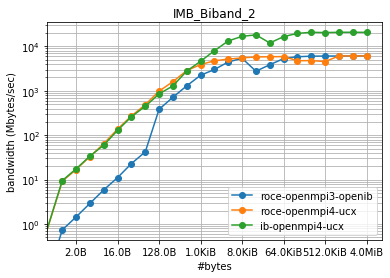

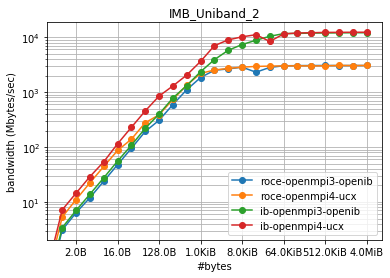

In [35]:
for test in ['IMB_PingPong', 'IMB_Biband_2', 'IMB_Uniband_2']:

    # find all data and work out differences between them:
    paths = modules.utils.find_run_outputs(root='../output', test=test)
    common, meta_diffs = modules.utils.diff_dicts([modules.utils.parse_path_metadata(p) for p in paths], ignore=['path'])
    fig0, ax0 = plt.subplots(nrows=1, ncols=1)
    ax1 = None
    
    # load and plot:
    for ix, path in enumerate(paths):
        data = modules.imb.read_imb_out(path)
        label = '-'.join(meta_diffs[ix].values())
        ax0.plot('#bytes', 'Mbytes/sec', 'o-', data=data, label=label)
        ax0.set_ylabel('bandwidth (Mbytes/sec)')
        if 't[usec]' in data:
            if ax1 is None:
                fig1, ax1 = plt.subplots(nrows=1, ncols=1)
            ax1.plot('#bytes', 't[usec]', 'o-', data=data, label=label)
            ax1.set_ylabel('latency (us)')
        else:
            ax1 = None
        
    # format plot:
    for ax in [ax0] + ([ax1] if ax1 is not None else []):
        ax.set_xscale('log', basex=2)
        ax.set_yscale('log', basey=10)
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: modules.utils.sizeof_fmt(x)))
        ax.grid(True, which="both")
        ax.set_xlabel('#bytes')
        ax.set_title(test)
        ax.legend()

In [ ]:
# TODO: Add max bandwidth vs n-process plots

# Performance History

The plots below show all performance variables (i.e. maximum/minimum values) for all tests in the repository, grouped by system/partition/environment.

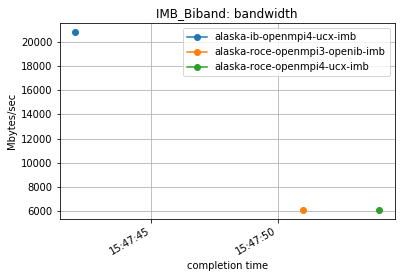

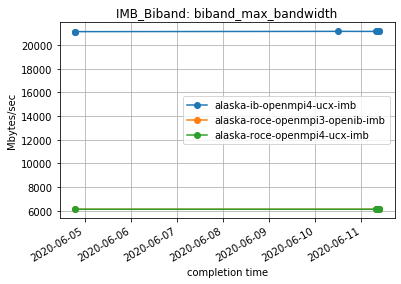

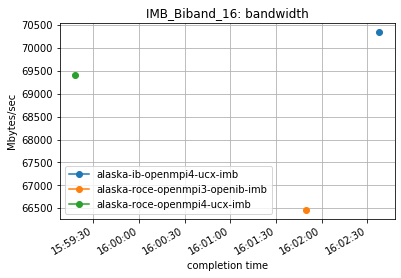

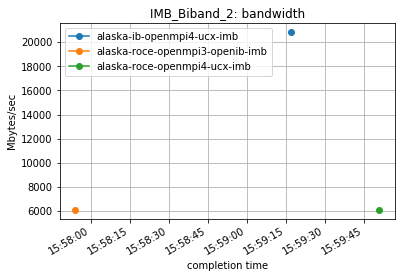

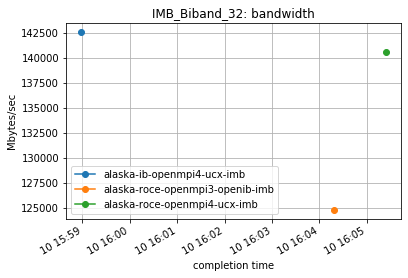

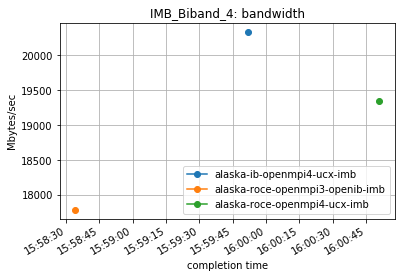

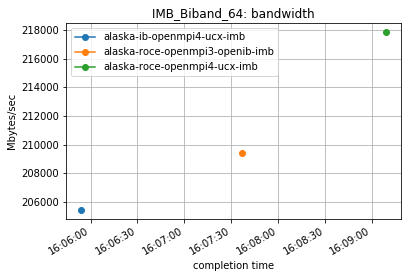

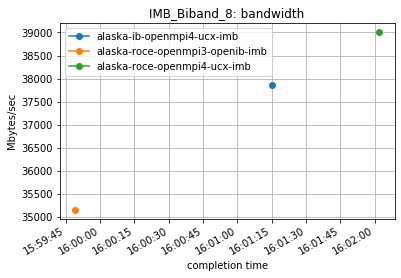

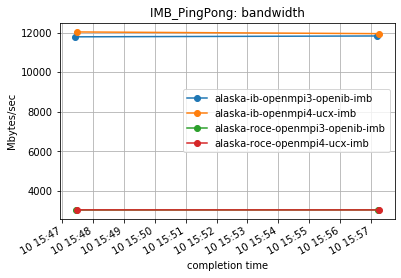

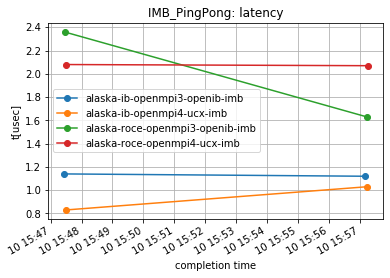

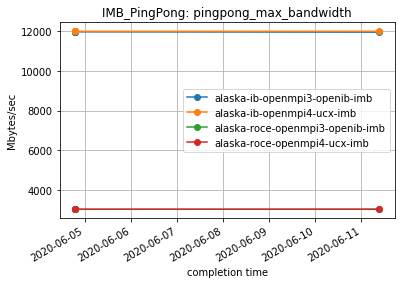

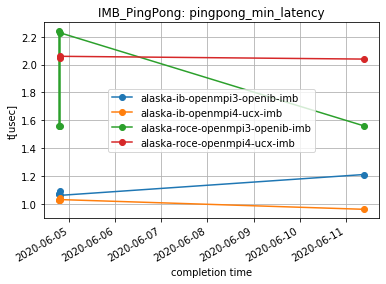

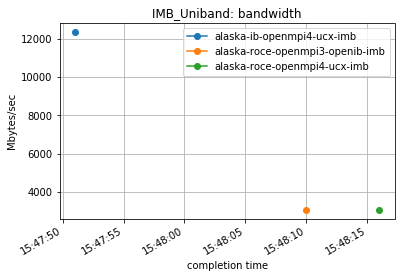

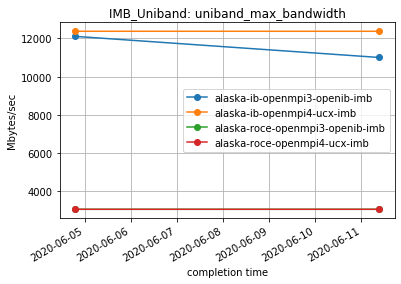

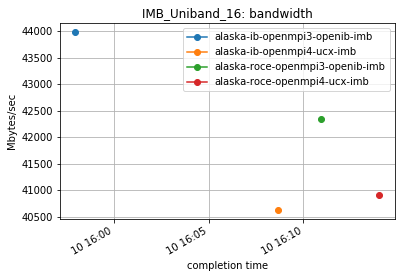

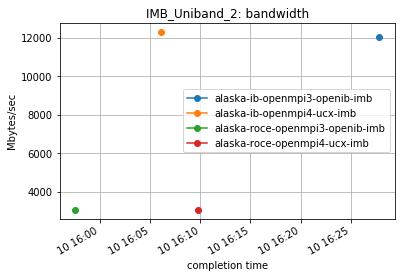

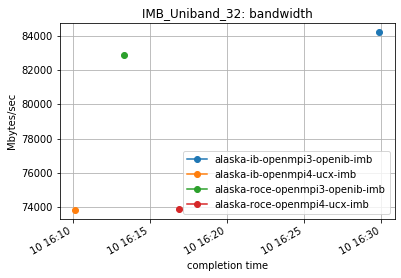

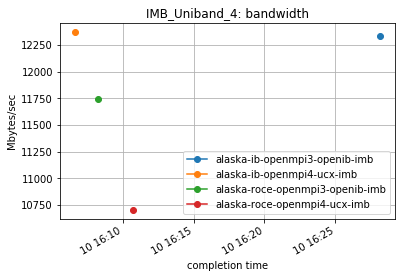

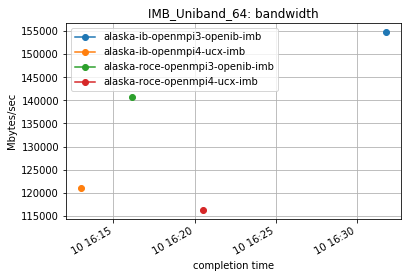

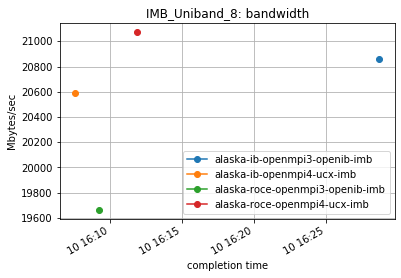

In [36]:
# Plot performance history:
perf_records = modules.utils.load_perf_logs('../perflogs', "IMB_", '.log')
modules.plots.plot_perf_history(perf_records)